# Financial Analysis in Python

What you will learn in this tutorial
------------------------------------

* Timeseries analysis using Pandas
* Using Google Trends to predict market movements
* Build your own trading strategy using Zipline
* Common trading strategies:
   * Momentum trading
   * Mean-reversion

Different stages towards a successful trading strategy
------------------------------------------------------

1. Data analysis / Idea generation
   * Pandas + Matplotlib (Part I)
2. Backtest strategy
   * Pandas can be used but many limitations (Part II)
   * -> Zipline (Part III)
3. Optimize
   * See my previous [PyData talk](http://blog.quantopian.com/zipline_in_the_cloud/)
4. Forward test strategy (paper trading)
   * Trivial on Quantopian (Part IV)
5. Live trading!
   * Coming soon...

# Pandas basics (Data analysis / Idea generation)

In [1]:
from IPython.core.display import HTML
HTML("<iframe src=http://pandas.pydata.org width=800 height=350></iframe>")

/Users/doxaras/miniforge3/envs/ML3.9/lib/python3.9/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [37]:
import datetime
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
from pandas import Series, DataFrame
pd.__version__

'1.1.5'

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

'3.3.3'

Creating/loading time series data
===================

* From Python structures
* From Yahoo finance
* From CSV files

### From Python structures

In [4]:
labels = ['a', 'b', 'c', 'd', 'e']
s = Series([1, 2, 3, 4, 5], index=labels)
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [5]:
'b' in s

True

In [6]:
s['b']

2

In [7]:
mapping = s.to_dict()
mapping

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}

In [8]:
Series(mapping)

a    1
b    2
c    3
d    4
e    5
dtype: int64

### From Yahoo finance

In [9]:
aapl = data.get_data_yahoo('AAPL', 
                                 start=datetime.datetime(2006, 10, 1), 
                                 end=datetime.datetime(2012, 1, 1))
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.306359
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.282328
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.322379
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.305435
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.286641


### From CSV files

In [10]:
aapl.to_csv('data/aapl_ohlc.csv')
!head data/aapl_ohlc.csv

Date,High,Low,Open,Close,Volume,Adj Close
2006-10-02,2.7096428871154785,2.653571367263794,2.682142972946167,2.6735713481903076,712639200,2.306358814239502
2006-10-03,2.676785707473755,2.6139285564422607,2.658928632736206,2.645714282989502,790708800,2.282327651977539
2006-10-04,2.694999933242798,2.6128571033477783,2.6464285850524902,2.692142963409424,829082800,2.3223793506622314
2006-10-05,2.7200000286102295,2.6475000381469727,2.66178560256958,2.672499895095825,683883200,2.3054349422454834
2006-10-06,2.680000066757202,2.6360714435577393,2.6578571796417236,2.65071439743042,466958800,2.2866408824920654
2006-10-09,2.6814286708831787,2.6260714530944824,2.635714292526245,2.6653571128845215,438222400,2.2992725372314453
2006-10-10,2.663571357727051,2.609999895095825,2.662142753601074,2.6360714435577393,531588400,2.274009943008423
2006-10-11,2.6421427726745605,2.5928571224212646,2.622142791748047,2.6153571605682373,571855200,2.2561402320861816
2006-10-12,2.692500114440918,2.6285715103149414,2.6

In [11]:
df = pd.read_csv('data/aapl_ohlc.csv', index_col='Date', parse_dates=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.306359
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.282328
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.322379
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.305435
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.286641


In [12]:
df.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', name='Date', length=1323, freq=None)

Series and DataFrame: First steps
=================================

* Indexing
* Slicing
* Creating new columns

In [13]:
ts = df['Close'][-10:]
ts

Date
2011-12-16    13.607857
2011-12-19    13.650357
2011-12-20    14.141071
2011-12-21    14.158929
2011-12-22    14.233929
2011-12-23    14.404643
2011-12-27    14.518929
2011-12-28    14.380000
2011-12-29    14.468572
2011-12-30    14.464286
Name: Close, dtype: float64

A DataFrame is a collection of Series objects. Slicing out a DataFrame column returns a Series.

In [14]:
type(ts)

pandas.core.series.Series

In [15]:
date = ts.index[5]
date

Timestamp('2011-12-23 00:00:00')

In [16]:
ts[date]

14.404643058776855

In [17]:
ts[5]

14.404643058776855

We can also select multiple columns.

In [18]:
df[['Open', 'Close']].head()

,Open,Close
Date,,
2006-10-02,2.682143,2.673571
2006-10-03,2.658929,2.645714
2006-10-04,2.646429,2.692143
2006-10-05,2.661786,2.672500
2006-10-06,2.657857,2.650714


New columns can be added on the fly.

In [19]:
df['diff'] = df.Open - df.Close
df.head()

,High,Low,Open,Close,Volume,Adj Close,diff
Date,,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.306359,0.008572
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.282328,0.013214
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.322379,-0.045714
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.305435,-0.010714
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.286641,0.007143


...and deleted on the fly.

In [20]:
del df['diff']
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-10-02,2.709643,2.653571,2.682143,2.673571,712639200,2.306359
2006-10-03,2.676786,2.613929,2.658929,2.645714,790708800,2.282328
2006-10-04,2.695000,2.612857,2.646429,2.692143,829082800,2.322379
2006-10-05,2.720000,2.647500,2.661786,2.672500,683883200,2.305435
2006-10-06,2.680000,2.636071,2.657857,2.650714,466958800,2.286641


Common Financial Computations
-----------------------------

* Moving Average
* Returns

In [21]:
close_px = df['Adj Close']

In [22]:
mavg = close_px.rolling(40).mean()
mavg[-10:]

Date
2011-12-16    11.975682
2011-12-19    11.967471
2011-12-20    11.959907
2011-12-21    11.958891
2011-12-22    11.957312
2011-12-23    11.956264
2011-12-27    11.957481
2011-12-28    11.955833
2011-12-29    11.962465
2011-12-30    11.968311
Name: Adj Close, dtype: float64

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [23]:
rets = close_px / close_px.shift(1) - 1
rets.head()

Date
2006-10-02         NaN
2006-10-03   -0.010420
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj Close, dtype: float64

Or alternatively `.pct_change()`.

In [24]:
close_px.pct_change().head()

Date
2006-10-02         NaN
2006-10-03   -0.010420
2006-10-04    0.017549
2006-10-05   -0.007296
2006-10-06   -0.008152
Name: Adj Close, dtype: float64

Plotting Basics
---------------

Series and DataFrames have an associated `.plot()` command (uses Matplotlib behind the scenes).

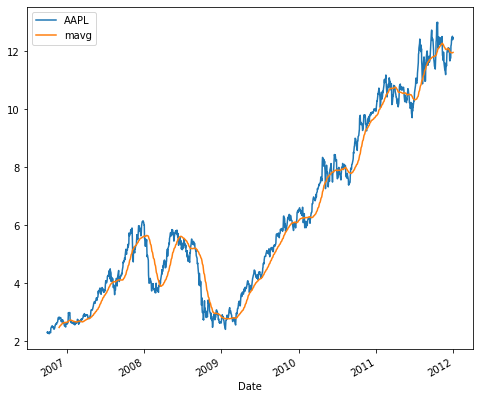

In [25]:
close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

## Optional: If there is time...

In [26]:
df = data.get_data_yahoo(['AAPL', 'GE', 'GOOG', 'IBM', 'KO', 'MSFT', 'PEP'], 
                               start=datetime.datetime(2010, 1, 1), 
                               end=datetime.datetime(2013, 1, 1))['Adj Close']
df.head()

Symbols,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Date,,,,,,,
2010-01-04,6.593426,10.840267,312.204773,92.163887,18.817513,24.105360,43.967365
2010-01-05,6.604825,10.896401,310.829926,91.050545,18.589882,24.113148,44.498646
2010-01-06,6.499768,10.840267,302.994293,90.459076,18.583282,23.965164,44.053520
2010-01-07,6.487752,11.401575,295.940735,90.145927,18.537094,23.715933,43.773525
2010-01-08,6.530883,11.647147,299.885956,91.050545,18.194000,23.879499,43.629932


In [27]:
rets = df.pct_change()

Text(0, 0.5, 'Returns KO')

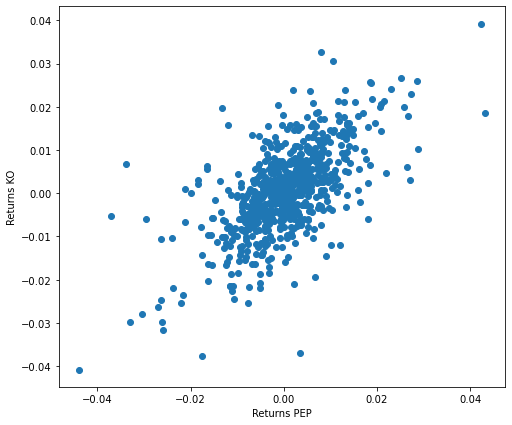

In [28]:
plt.scatter(rets.PEP, rets.KO)
plt.xlabel('Returns PEP')
plt.ylabel('Returns KO')

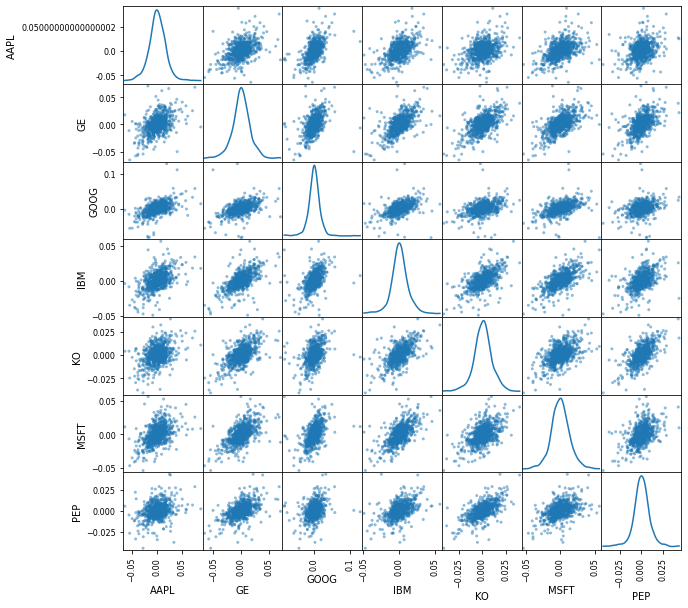

In [30]:
pd.plotting.scatter_matrix(rets, diagonal='kde', figsize=(10, 10));

In [31]:
corr = rets.corr()
corr

Symbols,AAPL,GE,GOOG,IBM,KO,MSFT,PEP
Symbols,,,,,,,
AAPL,1.000000,0.457052,0.533387,0.501586,0.389728,0.472767,0.308409
GE,0.457052,1.000000,0.462696,0.609330,0.595374,0.600064,0.533475
GOOG,0.533387,0.462696,1.000000,0.470777,0.401807,0.472851,0.330145
IBM,0.501586,0.609330,0.470777,1.000000,0.600904,0.646123,0.490431
KO,0.389728,0.595374,0.401807,0.600904,1.000000,0.530575,0.635890
MSFT,0.472767,0.600064,0.472851,0.646123,0.530575,1.000000,0.476906
PEP,0.308409,0.533475,0.330145,0.490431,0.635890,0.476906,1.000000


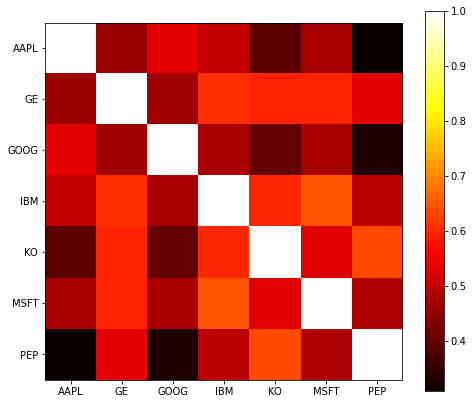

In [32]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

One thing we are often interested in is the relationship of expected returns and the risk we are taking one. Often there is a trade-off between the two.

Here we use `plt.annotate` to put labels on the scatterplot.

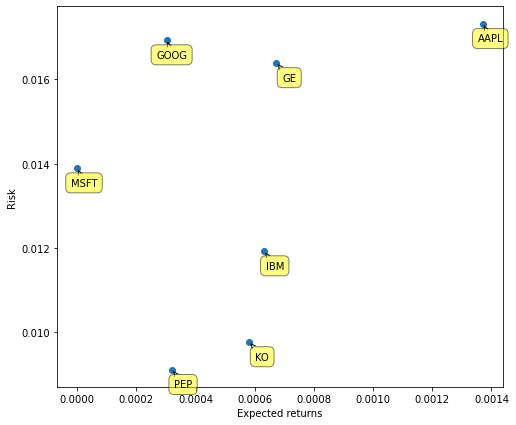

In [33]:
plt.scatter(rets.mean(), rets.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Data alignment and dealing with missing values
==============

* Join, merge, concatenate
* Filling NaNs

Lets pull some more securities from Yahoo finance and build a DataFrame of the adjusted closing prices.

In [35]:
series_list = []
securities = ['AAPL', 'GOOG', 'IBM', 'MSFT']
for security in securities:
    s = data.get_data_yahoo(security, start=datetime.datetime(2011, 10, 1), end=datetime.datetime(2013, 1, 1))['Adj Close']
    s.name = security # Rename series to match security name
    series_list.append(s)

`pd.concat` can be used to concatenate multiple `Series` into one `DataFrame`.

In [34]:
df = pd.concat(series_list, axis=1)
df.head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,366.72,495.52,168.24,23.32
2011-10-04,364.67,501.90,169.65,24.09
2011-10-05,370.30,504.70,171.69,24.61
2011-10-06,369.44,514.71,176.39,25.04
2011-10-07,362.02,515.12,177.07,24.95


In [36]:
df['AAPL'][1] = np.nan
# df.loc[1, ['GOOG', 'IBM']] = np.nan
# df.loc[[1, 2, 3], 'MSFT'] = np.nan
df.head()

NameError: name 'np' is not defined

Pandas has great support for computing with missing values.

In [36]:
(df.AAPL + df.GOOG).head()

Date
2011-10-03       NaN
2011-10-04       NaN
2011-10-05    875.00
2011-10-06    884.15
2011-10-07    877.14
dtype: float64

One common approacht to impute missing values in time series is forward filling.

In [37]:
df.ffill().head()

,AAPL,GOOG,IBM,MSFT
Date,,,,
2011-10-03,NaN,495.52,168.24,23.32
2011-10-04,364.67,495.52,168.24,23.32
2011-10-05,370.30,504.70,171.69,23.32
2011-10-06,369.44,514.71,176.39,23.32
2011-10-07,362.02,515.12,177.07,24.95
